
# LINE DETECTION

In [ ]:
import cv2
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img_color = mpimg.imread("/content/lane_car.jpg")

(800, 1200, 3)

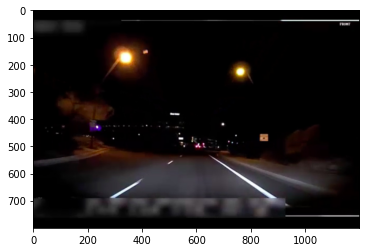

In [ ]:
plt.imshow(img_color)
img_color.shape

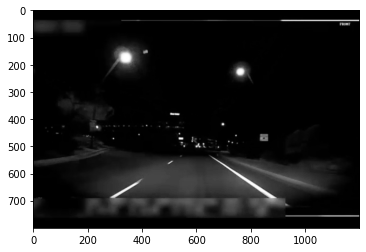

In [ ]:
img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap='gray')

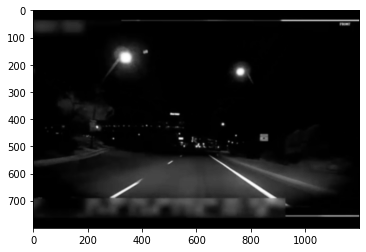

In [ ]:
img_blurr = cv2.GaussianBlur(img_gray,(7,7),0)
plt.imshow(img_blurr, cmap='gray')

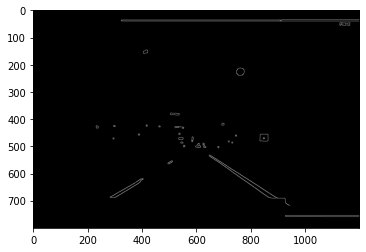

In [ ]:
img_canny = cv2.Canny(img_blurr,10,200,3)
plt.imshow(img_canny,cmap='gray')

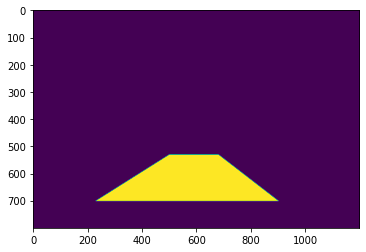

In [ ]:
## region of interest
mask = np.zeros_like(img_gray)
vertices = np.array([[(230,700),(500,530),(680,530),(900,700)]],dtype=np.int32)
cv2.fillPoly(mask,vertices,(255,0))
plt.imshow(mask)

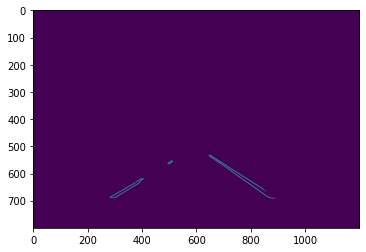

In [ ]:
## And operation

masked_image = cv2.bitwise_and(img_canny,mask)
plt.imshow(masked_image)

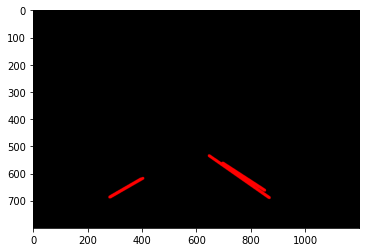

In [ ]:
lines = cv2.HoughLinesP(masked_image,2,np.pi/180,30,minLineLength=100, maxLineGap=50)
line_image = np.zeros((masked_image.shape[0],masked_image.shape[1],3),dtype=np.uint8)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
plt.imshow(line_image)

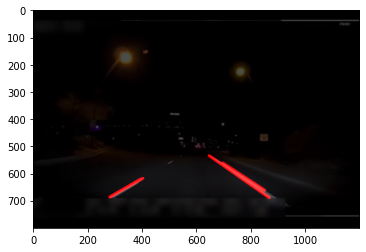

In [ ]:
Image_lines = cv2.addWeighted(img_color,0.3,line_image,1.5,0)
plt.imshow(Image_lines)